<a href="https://colab.research.google.com/github/michellssGUi/dataScience/blob/main/Wallmart_Melhor_Loja_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Lojas Wallmart - 31/05/2022

---

# Introdução

Walmart, Inc., (Wal-Mart até 2008) é uma multinacional estadunidense de lojas de departamento. A companhia foi eleita a maior multinacional de 2010. Foi fundada por Sam Walton em 1962, incorporada em 31 de outubro de 1969 e feita capital aberto na New York Stock Exchange, em 1972. A sede da Wal-Mart fica em Bentonville, Arkansas. Walmart é a maior loja de varejo dos Estados Unidos. Em 2009, a multinacional gerou 51% dos seus US$258 bilhões em vendas nos seus negócios de mercearia nos Estados Unidos. A Walmart também opera a Sam's Club na América do Norte.

Walmart tem 11.000 lojas em 27 países diferentes, com 55 nomes diferentes. A companhia opera sob seu próprio nome nos Estados Unidos, incluindo seus 50 estados. Ela também opera sob seu próprio nome em Porto Rico. Opera no México como Walmex, no Reino Unido como Asda, no Japão como Seiyu, como Best Price na Índia e como BIG no Brasil (em sociedade com o Advent International).

https://pt.wikipedia.org/wiki/Walmart



## 1.1 - Objetivo do Projeto
> Fazer um levantamento do faturamento das lojas nos USA e apontar qual loja seria melhor para expandir seu tamaho.

## 1.2 Descrevendo os dados:
> Os dados apresentam as vendas semanais de 2010/02/05 à 2012/11/12 em umtotal de 45 lojas varejistas da rede Wallmart e também algumas métricas econômicas e meteorológicas por semana. 

A descrição destas características estão abaixo:

## Feriados Importantes

Holiday | Semanas
----|----
Super Bowl |	12-Feb-10, 11-Feb-11, 10-Feb-12
Labour Day | 10-Sep-10, 09-Sep-11, 07-Sep-12
Thanksgiving | 26-Nov-10, 25-Nov-11, 23-Nov-12
Cristmans | 31-Dec-10, 30-Dec-11, 28-Dec-12



## 2 - Os dados

## Index das tabelas e suas descrições

Variável | Descrição
----|----
Store | Número da loja
Date | Semana de venda
Weekly_Sales | Vendas Nauela Semana
Hliday_Flag | Flag se é ou não semana com feriado (1 - Holiday Weeh e 0 - Non Holiday Week)
Temeratura | Temperatura do dia em °F
Fuel_Price | Preço do combustível na região da loja
CPI | Índice de preços ao consumidor
Unemployment | Taxa de desemprego



> Realizando importação das bibliotecas python as quais poderão ser utilizadas durante o processo de limpeza, organização e análise dos dados.

In [148]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import scipy as scp
import sqlalchemy
import statsmodels.api as sm

> Verificando as versões das viliotecas utilizadas

In [149]:
print('Versão do numpy -> %s' % np.__version__)
print('Versão do pandas -> %s' % pd.__version__)
print('Versão do seaborn -> %s' % sn.__version__)
print('Versão do scipy -> %s' % scp.__version__)

#Resultado da consulta das verções dia 28/05/2022
#Versão do numpy -> 1.21.6
#Versão do pandas -> 1.3.5
#Versão do seaborn -> 0.11.2
#Versão do scipy -> 1.4.1

Versão do numpy -> 1.21.6
Versão do pandas -> 1.3.5
Versão do seaborn -> 0.11.2
Versão do scipy -> 1.4.1


### 2.1 - Importanto os dados
> Os dados se encontram em um aquivo .CSV e foram importados fazendo us da biplioteca "pandas".

In [150]:
df = pd.read_csv('Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


## 2.2 - Limpeza e preparação dos dados
> Durante esse processo irei preparar os dados para análise realizar a limpeza, transforamção e reorganização à medida que for necessário.

> Formatando a coluna de data  para facilitar as consultas e filtros

In [151]:
df['Date'] = pd.to_datetime(df['Date'])
df['day'] = df['Date'].dt.weekday
df['month'] = df['Date'].dt.month
df['year']  = df['Date'].dt.year
df.drop('Date',axis=1,inplace=True)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


### 2.2.1 - Tratamento dos dados ausentes
> Dados ausentes são comuns em muitas aplicações de análise de dados. Um dos objetivos desse passo é deixar o trabalho o menos prolemático possível.


> Verificando a existência de dados ausentes

In [152]:
df.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
day             0
month           0
year            0
dtype: int64

> Por padrão, "dropna()" descarta qualquer linha contendo um valor ausente. Devido a isso é importante avaliar se a perda dessa linhas não irá impactar diretamento na análise dos dados.

> Pelo resultado da consulta anterior percebe-se que não ha dados nulos, estarei executando a trtativa apenas para fins didaticos.

In [153]:
df = df.dropna()
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,4,9,2012
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,3,5,2012
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,0,12,2012
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,4,10,2012


> Nesse caso não hove perda de lihas, continuamos com as mesmas 6435 row's e 10 colums.

> OBS: Em caso de se perceber a perda demasiada de row's e por consequência a perda de dados importantes, poderia-se fazer a substituição desses dados por um valor constante, pela média e ou mediana dos demais valores.

Segue exemplo:

> A funçao "fillna()" devolve um novo objeto reindexado com as condições que foram passadas... nesse caso retorna a media cos campos de valor 'NaN'.

### 2.2.2 - Tratamento de dados duplicados
> Linhas duplicadas podem ser encontradas em um DataFrame por diversos motivos, por isso se faz necessário verificar sua existência e trata-los.

> Farei uso do método "duplicated()" para verificar a existência de dados dupicados.

In [154]:
df = df.drop_duplicates()
pd.DataFrame(df)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,4,9,2012
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,3,5,2012
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,0,12,2012
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,4,10,2012


### 2.2.3 - Renomeando os índices
> Para maior facilidade na maniulação dos dados estarei passando os indices para letras minusculas.

In [155]:
df.rename(columns=str.lower, inplace=True)
pd.DataFrame.head(df)

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,day,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


> Aqui me asseguro de organizar a tabela, nesse caso tend como referência principal a variável 'store'.

In [156]:
df = pd.DataFrame.sort_values(df, by=['store'])
df.head()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,day,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
92,1,1594938.89,0,59.11,3.297,217.998085,7.866,4,11,2011
93,1,1539483.70,0,62.25,3.308,218.220509,7.866,4,11,2011
94,1,2033320.66,1,60.14,3.236,218.467621,7.866,4,11,2011
95,1,1584083.95,0,48.91,3.172,218.714733,7.866,5,2,2011


## 3 - Análise dos dados



> Analisando a correlação entre as variáveis da tabela.
> Por serem irrelevantes nessa analise, estarei apagando algumas colunas para melhor visualização dos resultados.

In [193]:
df_corr = df.drop(columns=['store', 'holiday_flag', 'day', 'month', 'year'])
df_corr.corr()

,weekly_sales,temperature,fuel_price,cpi,unemployment
weekly_sales,1.000000,-0.063810,0.009464,-0.072634,-0.106176
temperature,-0.063810,1.000000,0.144982,0.176888,0.101158
fuel_price,0.009464,0.144982,1.000000,-0.170642,-0.034684
cpi,-0.072634,0.176888,-0.170642,1.000000,-0.302020
unemployment,-0.106176,0.101158,-0.034684,-0.302020,1.000000


> Como se pode perceber não ha correlação significativa entre as variáveis... Apenas 'unemployment' e 'cpi' que apresentam um fraca correlação chegando a 0.3.

> Estarei dividindo a tabela com referência no ano, dessa forma poderei ter melhor visualização e entendimento da constância positiva ou negativa das operaçẽs.

## 3.1 - Ordenando o df pela variável 'year'

In [195]:
df_data = df.sort_values(by=('year'))
df_data

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,day,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
4473,32,1141019.11,0,42.30,2.737,191.041147,9.137,5,12,2010
4472,32,1063056.21,0,49.20,2.729,190.996438,9.137,1,5,2010
4471,32,1115138.51,0,45.45,2.748,190.951728,9.137,4,10,2010
1893,14,1855703.66,0,70.58,2.707,182.716838,8.724,6,1,2010
...,...,...,...,...,...,...,...,...,...,...
1998,14,1687592.16,0,64.89,3.985,192.170412,8.667,3,5,2012
1997,14,1522512.20,0,64.88,3.997,192.013558,8.684,4,9,2012
1996,14,1565352.46,0,65.32,4.038,191.856704,8.684,4,9,2012
1987,14,1553250.16,0,78.89,3.567,191.167043,8.684,4,7,2012


### 3.1.1 - df do ano de 2010

In [196]:
df_2010 = df.loc[df_data['year'] == 2010]
df_2010.head()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,day,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
20,1,1422711.60,0,84.34,2.653,211.338653,7.808,4,6,2010
21,1,1492418.14,0,80.91,2.669,211.223533,7.787,6,2,2010
22,1,1546074.18,0,80.48,2.642,211.108414,7.787,1,9,2010
23,1,1448938.92,0,83.15,2.623,211.100385,7.787,4,7,2010


### 3.1.2 - df do ano de 2011

In [197]:
df_2011 = df.loc[df_data['year'] == 2011]
df_2011.head()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,day,month,year
92,1,1594938.89,0,59.11,3.297,217.998085,7.866,4,11,2011
93,1,1539483.70,0,62.25,3.308,218.220509,7.866,4,11,2011
94,1,2033320.66,1,60.14,3.236,218.467621,7.866,4,11,2011
95,1,1584083.95,0,48.91,3.172,218.714733,7.866,5,2,2011
96,1,1799682.38,0,43.93,3.158,218.961846,7.866,0,9,2011


### 3.1.3 - df do ano de 2012

In [198]:
df_2012 = df.loc[df_data['year'] == 2012]
df_2012.head()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,day,month,year
100,1,1550369.92,0,49.01,3.157,219.714258,7.348,4,6,2012
101,1,1459601.17,0,48.53,3.261,219.892526,7.348,4,1,2012
102,1,1394393.84,0,54.11,3.268,219.985689,7.348,4,1,2012
103,1,1319325.59,0,54.26,3.290,220.078852,7.348,4,1,2012
104,1,1636339.65,0,56.55,3.360,220.172015,7.348,4,3,2012


---
---
---


### 3.1 - Qual o preço médio de vendas semanal por loja?

In [157]:
df.groupby(['store'])['weekly_sales'].sum().to_frame().sort_values(by='weekly_sales', ascending=False).head().reset_index()


,store,weekly_sales
0,20,3.013978e+08
1,4,2.995440e+08
2,14,2.889999e+08
3,13,2.865177e+08
4,2,2.753824e+08


In [158]:
df_mean_ac = df.groupby(['store'])['weekly_sales'].mean().to_frame().sort_values(by='weekly_sales', ascending=False).head().reset_index()
df_mean_ac

,store,weekly_sales
0,20,2.107677e+06
1,4,2.094713e+06
2,14,2.020978e+06
3,13,2.003620e+06
4,2,1.925751e+06


### 3.2 - Qual o atributo que tem mais correlação (positiva ou negativa) com o numero de vendas? (E que faça sentido)

In [159]:
df_corr = df.corr()
df_corr.drop(columns=['holiday_flag','day', 'month', 'year'])

,store,weekly_sales,temperature,fuel_price,cpi,unemployment
store,1.000000e+00,-0.335332,-0.022659,0.060023,-0.209492,0.223531
weekly_sales,-3.353320e-01,1.000000,-0.063810,0.009464,-0.072634,-0.106176
holiday_flag,-1.571670e-16,0.036891,-0.155091,-0.078347,-0.002162,0.010960
temperature,-2.265908e-02,-0.063810,1.000000,0.144982,0.176888,0.101158
fuel_price,6.002295e-02,0.009464,0.144982,1.000000,-0.170642,-0.034684
cpi,-2.094919e-01,-0.072634,0.176888,-0.170642,1.000000,-0.302020
unemployment,2.235313e-01,-0.106176,0.101158,-0.034684,-0.302020,1.000000
day,1.231104e-15,-0.021041,0.018331,-0.026512,-0.009596,0.037773
month,2.402988e-15,0.067535,0.066440,-0.052832,0.001479,-0.002062
year,-1.697793e-12,-0.018378,0.064269,0.779470,0.074796,-0.241813


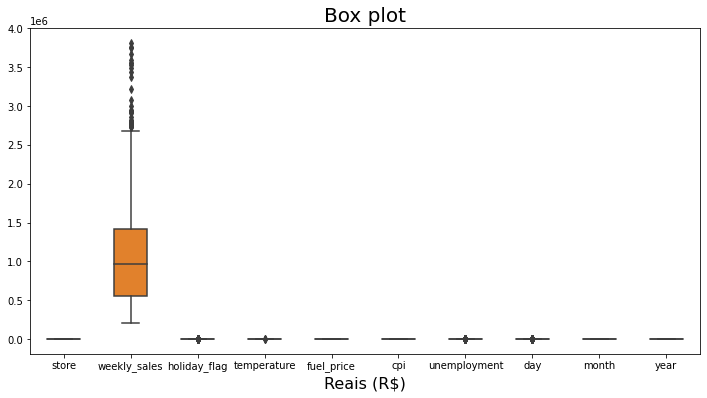

In [160]:
ax = sn.boxplot(data=df, orient='w', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box plot', fontsize=20)
ax.set_xlabel('Reais (R$)', fontsize=16)
ax

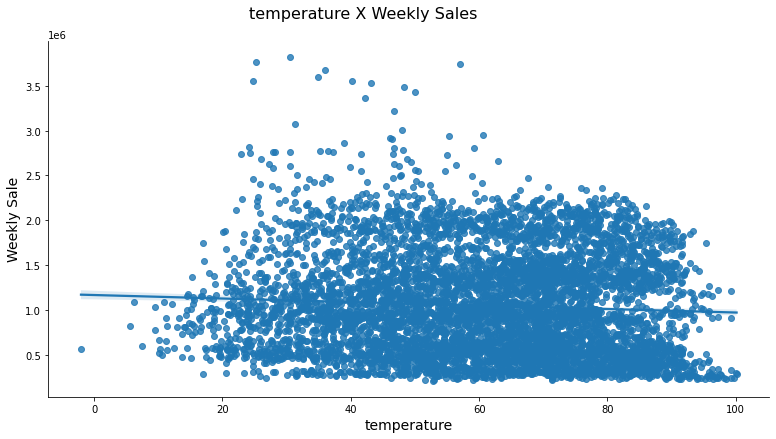

In [161]:
ax = sn.lmplot(x="temperature", y="weekly_sales", data=df)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('temperature X Weekly Sales', fontsize=16, y=1.02)
ax.set_xlabels("temperature", fontsize=14)
ax.set_ylabels("Weekly Sale", fontsize=14)
ax

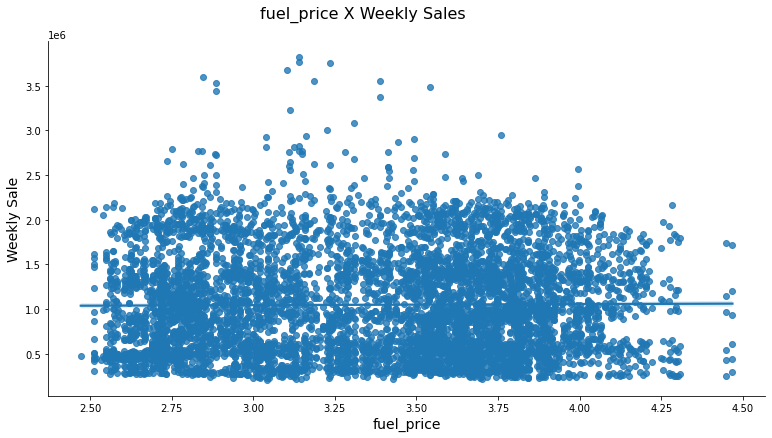

In [162]:
ax = sn.lmplot(x="fuel_price", y="weekly_sales", data=df)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('fuel_price X Weekly Sales', fontsize=16, y=1.02)
ax.set_xlabels("fuel_price", fontsize=14)
ax.set_ylabels("Weekly Sale", fontsize=14)
ax

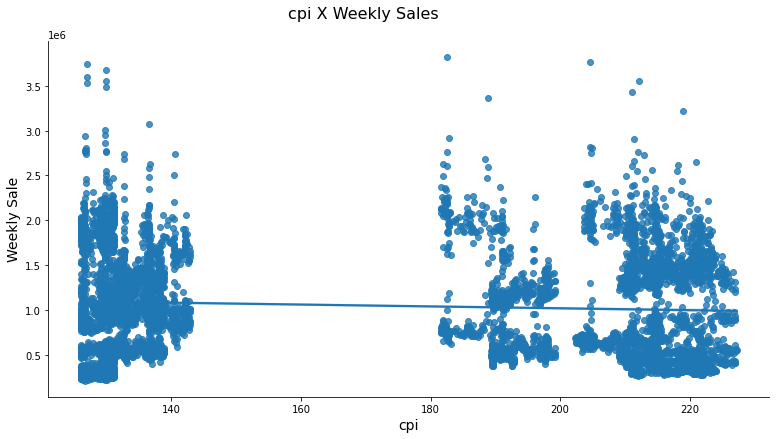

In [163]:
ax = sn.lmplot(x="cpi", y="weekly_sales", data=df)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('cpi X Weekly Sales', fontsize=16, y=1.02)
ax.set_xlabels("cpi", fontsize=14)
ax.set_ylabels("Weekly Sale", fontsize=14)
ax

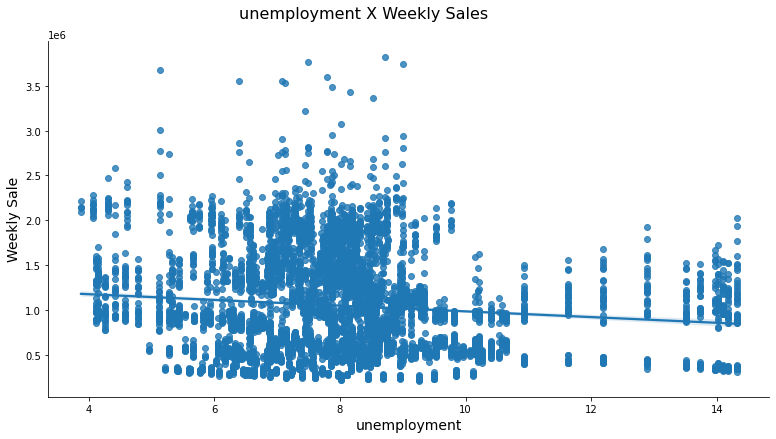

In [164]:
ax = sn.lmplot(x="unemployment", y="weekly_sales", data=df)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('unemployment X Weekly Sales', fontsize=16, y=1.02)
ax.set_xlabels("unemployment", fontsize=14)
ax.set_ylabels("Weekly Sale", fontsize=14)
ax

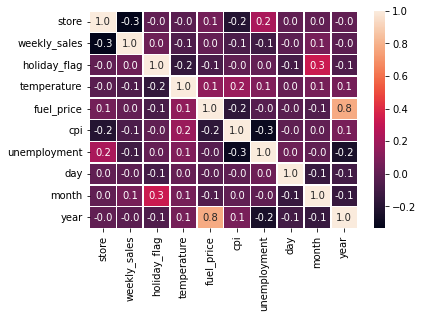

In [165]:
plot = sn.heatmap(df_corr, annot = True, fmt=".1f", linewidths=.6)
plot

>> Esta é a matriz gerada, a qual nos permitirá interpretar a correlação entre as variávies.

* Aqui podemos concluir que não existe nenhuma correlação significativa entre as variáveis... Nota-se apenas uma correlação fraca de 0.3 entre cpi e unemployment a qual segue logo abaixo mais detalhamentos.
---

In [166]:
cpi_une = df[['cpi','unemployment']]
cpi_une

,cpi,unemployment
0,211.096358,8.106
92,217.998085,7.866
93,218.220509,7.866
94,218.467621,7.866
95,218.714733,7.866
...,...,...
6340,182.598306,8.549
6341,182.658578,8.549
6342,182.919337,8.549
6362,185.648692,8.521


In [167]:
cpi_une.corr()

,cpi,unemployment
cpi,1.00000,-0.30202
unemployment,-0.30202,1.00000


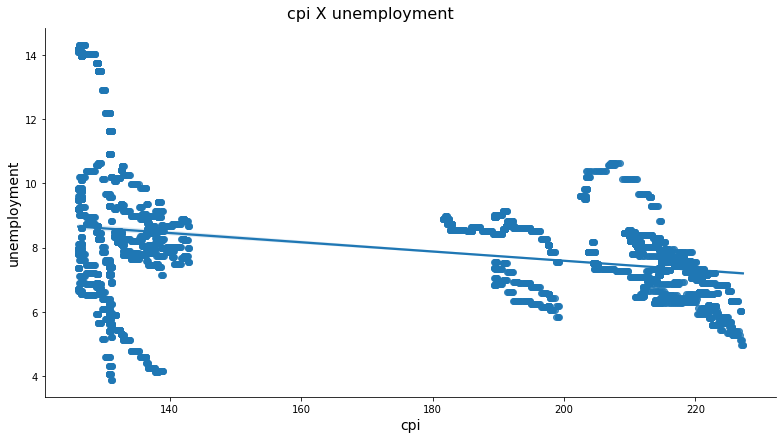

In [168]:
ax = sn.lmplot(x="cpi", y="unemployment", data=cpi_une)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('cpi X unemployment', fontsize=16, y=1.02)
ax.set_xlabels("cpi", fontsize=14)
ax.set_ylabels("unemployment", fontsize=14)
ax

### 3.3 - Da loja com maior venda acumulada (soma de vendas de todo o periodo), quantas semanas do ano ele ultrapassa a média do período?

### 3.3.1 - Separando a loja com maior valor acumulado

In [169]:
loja_n = 20
df_loja20_ac = df.loc[df['store'] == loja_n]
df_loja20_ac.head()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,day,month,year
2812,20,2298776.83,0,46.32,3.452,211.639431,7.082,5,2,2011
2811,20,2906233.25,1,46.38,3.492,211.412076,7.082,4,11,2011
2790,20,2053165.41,0,69.66,3.748,208.334643,7.274,4,1,2011
2809,20,2269975.85,0,47.27,3.530,210.981020,7.082,4,11,2011
2808,20,2284106.60,0,43.88,3.551,210.836455,7.082,0,4,2011


### 3.3.2 - Encotrando a média de vendas semanais da loja com maios valor de vendas aculmuladas.

In [170]:
df_loja20_media_ac = df_loja20_ac['weekly_sales'].mean()
print(f'Média das vedas da loja com maior valor acumulado -> ${df_loja20_media_ac:.2f}')

Média das vedas da loja com maior valor acumulado -> $2107676.87


### 3.3.3 - Verificando quantas vezes a loja de maior valor acumulado ultrapassa a média semanal.

In [171]:
df_LJ = df_loja20_ac.loc[df_loja20_ac['store'] == loja_n]['weekly_sales'] > df_loja20_media_ac
df_LJ = df_LJ.value_counts()
df_LJ_False = df_LJ[0]
df_LJ_True = df_LJ[1]
print(f'Da loja com maior valor acumulado (loja {loja_n}) verifiquei que ela ultrapassa em {df_LJ_True} semanas o valor médio semanal das vendas.')

Da loja com maior valor acumulado (loja 20) verifiquei que ela ultrapassa em 52 semanas o valor médio semanal das vendas.


### 3.3.4 - Loja com maior venda acumulada

In [172]:
accumulated_sale = df.groupby(['store'])['weekly_sales'].sum().to_frame().sort_values(by='weekly_sales', ascending=False).head(1).reset_index()
accumulated_sale_B = int(accumulated_sale['weekly_sales'])
loja = int(accumulated_sale['store'])
print(f'A loja {loja} foi a com maior valor de vendas acululadas -> R${accumulated_sale_B:.2f}')

A loja 20 foi a com maior valor de vendas acululadas -> R$301397792.00


### 3.4 - Fazendo um gráfico com as vendas máximas, mínimas e médias de todas as lojas ao longo do tempo. Ressaltando o período de feriados mencionados acima.

In [173]:
# 4) Criando um df_aux, df_min, df_med auxiliar para armazenar as vendas máxima, mínima e média por loja (BAseada na ideia do Arnon)

df_aux_max = df['weekly_sales'].max()
df_aux_med = df['weekly_sales'].mean()
df_aux_min = df['weekly_sales'].min()
df_aux = [df_aux_max, df_aux_med, df_aux_min]
df_aux = pd.DataFrame(df_aux)
df_aux

,0
0,3.818686e+06
1,1.046965e+06
2,2.099862e+05


In [174]:
print(f'Max -> ${float(df_aux_max):.2f}')
print(f'Med -> ${float(df_aux_med):.2f}')
print(f'Min -> ${float(df_aux_min):.2f}' )

Max -> $3818686.45
Med -> $1046964.88
Min -> $209986.25


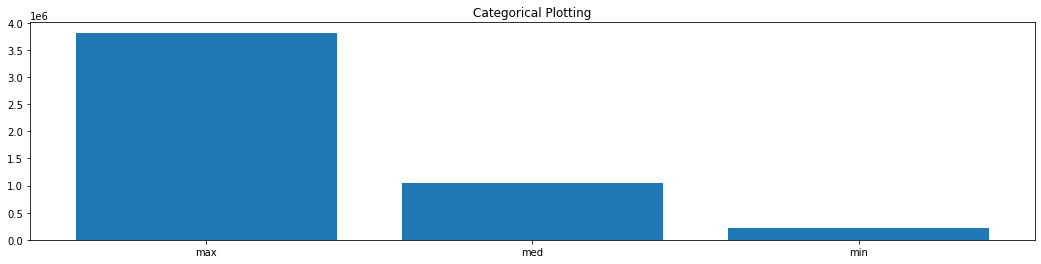

In [175]:
names = ['max', 'med', 'min']
values = [df_aux[0][0], df_aux[0][1], df_aux[0][2]]

plt.figure(figsize=(18, 4))

plt.plot(131)
plt.bar(names, values)

plt.title('Categorical Plotting')
plt.show()

In [176]:
df_data = df.sort_values(by=('year'))
df_data

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,day,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
4473,32,1141019.11,0,42.30,2.737,191.041147,9.137,5,12,2010
4472,32,1063056.21,0,49.20,2.729,190.996438,9.137,1,5,2010
4471,32,1115138.51,0,45.45,2.748,190.951728,9.137,4,10,2010
1893,14,1855703.66,0,70.58,2.707,182.716838,8.724,6,1,2010
...,...,...,...,...,...,...,...,...,...,...
1998,14,1687592.16,0,64.89,3.985,192.170412,8.667,3,5,2012
1997,14,1522512.20,0,64.88,3.997,192.013558,8.684,4,9,2012
1996,14,1565352.46,0,65.32,4.038,191.856704,8.684,4,9,2012
1987,14,1553250.16,0,78.89,3.567,191.167043,8.684,4,7,2012


#### Verificando as lojas que mais venderam em 2010

In [178]:
df_vendas_2010_group = df_vendas_2010.groupby(['store'])['weekly_sales'].max().to_frame().sort_values(by=['weekly_sales'], ascending=False).reset_index()
df_vendas_2010_group.head(10)

,store,weekly_sales
0,14,3818686.45
1,20,3766687.43
2,10,3749057.69
3,13,3595903.20
4,4,3526713.39
5,2,3436007.68
6,27,3078162.08
7,23,2734277.10
8,6,2727575.18
9,19,2678206.42


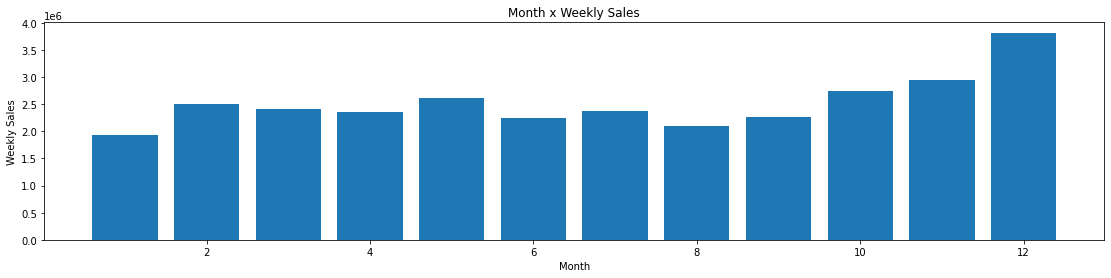

In [179]:
x=df_vendas_2010['month']
y=df_vendas_2010['weekly_sales'] 

plt.figure(figsize=(19, 4))
plt.bar(x, y) 
plt.xlabel("Month")  
plt.ylabel("Weekly Sales")    
plt.title("Month x Weekly Sales") 
plt.show() 

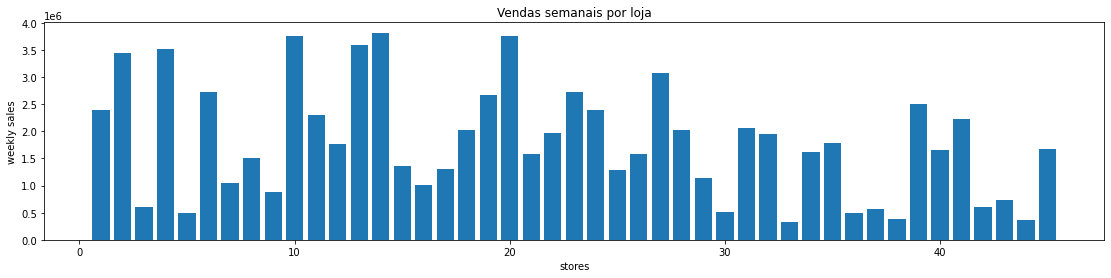

In [139]:
x=df_vendas_2010['store']
y=df_vendas_2010['weekly_sales'] 

plt.figure(figsize=(19, 4))
plt.bar(x, y) 
plt.xlabel("stores")  
plt.ylabel("weekly sales")    
plt.title("Vendas semanais por loja") 
plt.show() 


### Tabela 2011

In [180]:
df_vendas_2011 = df.loc[df_data['year'] == 2011]
df_vendas_2011.head()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,day,month,year
92,1,1594938.89,0,59.11,3.297,217.998085,7.866,4,11,2011
93,1,1539483.70,0,62.25,3.308,218.220509,7.866,4,11,2011
94,1,2033320.66,1,60.14,3.236,218.467621,7.866,4,11,2011
95,1,1584083.95,0,48.91,3.172,218.714733,7.866,5,2,2011
96,1,1799682.38,0,43.93,3.158,218.961846,7.866,0,9,2011


,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,day,month,year
92,1,1594938.89,0,59.11,3.297,217.998085,7.866,4,11,2011
93,1,1539483.70,0,62.25,3.308,218.220509,7.866,4,11,2011
94,1,2033320.66,1,60.14,3.236,218.467621,7.866,4,11,2011
95,1,1584083.95,0,48.91,3.172,218.714733,7.866,5,2,2011
96,1,1799682.38,0,43.93,3.158,218.961846,7.866,0,9,2011


#### Verificando as lojas que mais venderam em 2011

In [181]:
df_vendas_2011_group = df_vendas_2011.groupby(['store'])['weekly_sales'].max().to_frame().sort_values(by=['weekly_sales'], ascending=False).reset_index()
df_vendas_2011_group.head(10)

,store,weekly_sales
0,4,3676388.98
1,13,3556766.03
2,20,3555371.03
3,10,3487986.89
4,14,3369068.99
5,2,3224369.80
6,27,2739019.75
7,6,2644633.02
8,23,2587953.32
9,39,2554482.84


,store,weekly_sales
0,4,3676388.98
1,13,3556766.03
2,20,3555371.03
3,10,3487986.89
4,14,3369068.99
5,2,3224369.80
6,27,2739019.75
7,6,2644633.02
8,23,2587953.32
9,39,2554482.84


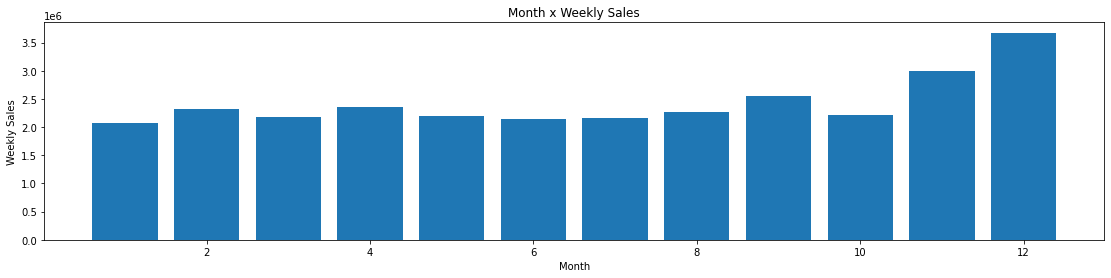

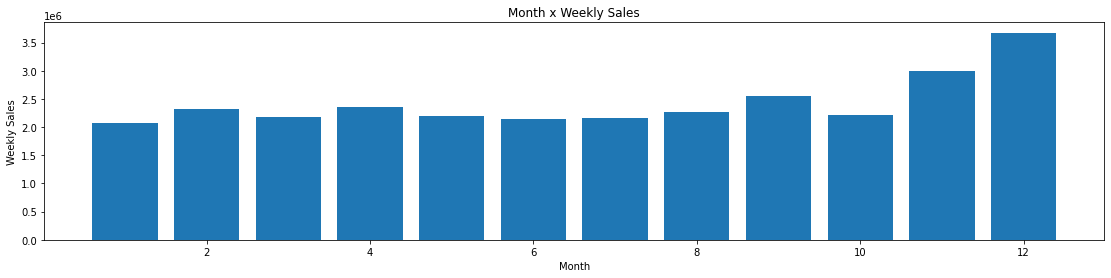

In [182]:
x=df_vendas_2011['month']
y=df_vendas_2011['weekly_sales'] 

plt.figure(figsize=(19, 4))
plt.bar(x, y) 
plt.xlabel("Month")  
plt.ylabel("Weekly Sales")    
plt.title("Month x Weekly Sales") 
plt.show() 

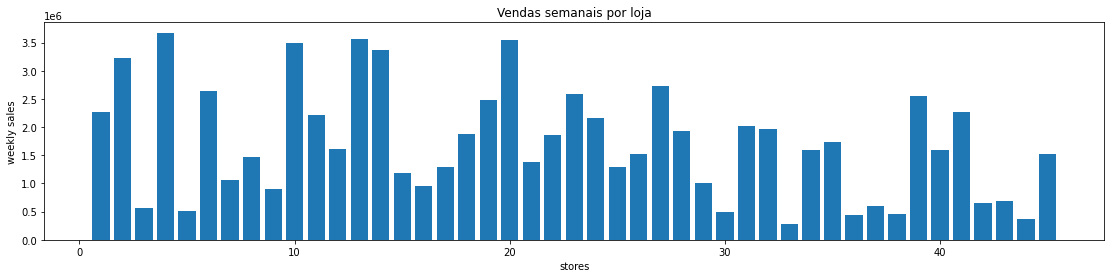

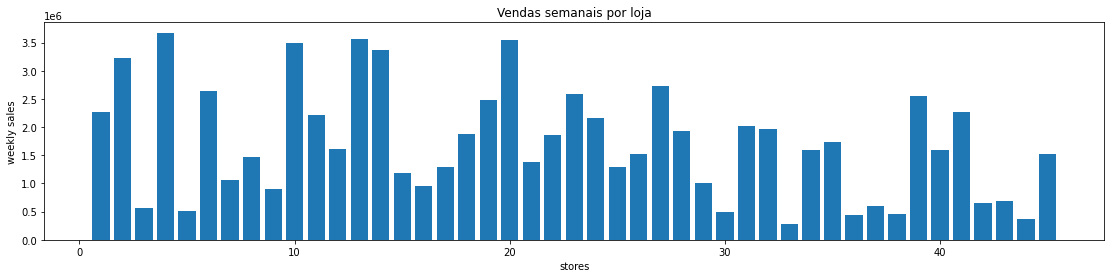

In [183]:
x=df_vendas_2011['store']
y=df_vendas_2011['weekly_sales'] 

plt.figure(figsize=(19, 4))
plt.bar(x, y) 
plt.xlabel("stores")  
plt.ylabel("weekly sales")    
plt.title("Vendas semanais por loja") 
plt.show() 

### Tabela 2012

In [184]:
df_vendas_2012 = df.loc[df_data['year'] == 2012]
df_vendas_2012.head()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,day,month,year
100,1,1550369.92,0,49.01,3.157,219.714258,7.348,4,6,2012
101,1,1459601.17,0,48.53,3.261,219.892526,7.348,4,1,2012
102,1,1394393.84,0,54.11,3.268,219.985689,7.348,4,1,2012
103,1,1319325.59,0,54.26,3.290,220.078852,7.348,4,1,2012
104,1,1636339.65,0,56.55,3.360,220.172015,7.348,4,3,2012


,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,day,month,year
100,1,1550369.92,0,49.01,3.157,219.714258,7.348,4,6,2012
101,1,1459601.17,0,48.53,3.261,219.892526,7.348,4,1,2012
102,1,1394393.84,0,54.11,3.268,219.985689,7.348,4,1,2012
103,1,1319325.59,0,54.26,3.290,220.078852,7.348,4,1,2012
104,1,1636339.65,0,56.55,3.360,220.172015,7.348,4,3,2012


#### Verificando as lojas que mais venderam em 2012

In [185]:
df_vendas_2012_group = df_vendas_2012.groupby(['store'])['weekly_sales'].max().to_frame().sort_values(by=['weekly_sales'], ascending=False).reset_index()
df_vendas_2012_group.head(10)

,store,weekly_sales
0,20,2565259.92
1,4,2470206.13
2,14,2376022.26
3,13,2271614.76
4,10,2218595.80
5,2,2196688.46
6,27,2062224.92
7,1,1899676.88
8,6,1876359.39
9,39,1764847.94


,store,weekly_sales
0,20,2565259.92
1,4,2470206.13
2,14,2376022.26
3,13,2271614.76
4,10,2218595.80
5,2,2196688.46
6,27,2062224.92
7,1,1899676.88
8,6,1876359.39
9,39,1764847.94


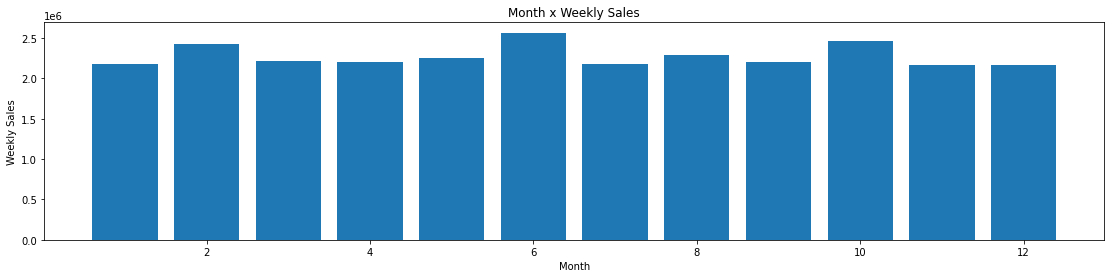

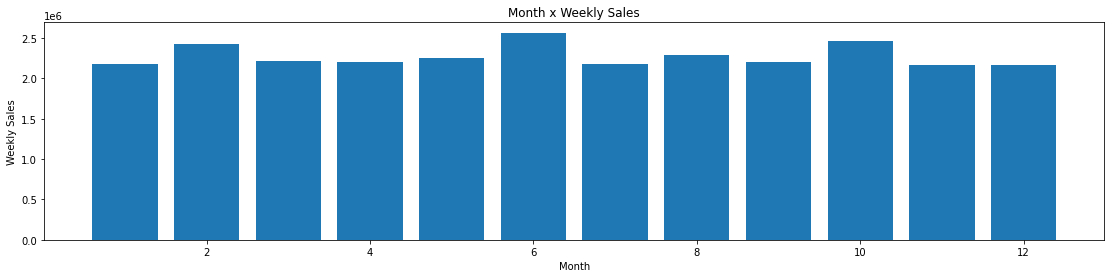

In [186]:
x=df_vendas_2012['month']
y=df_vendas_2012['weekly_sales'] 

plt.figure(figsize=(19, 4))
plt.bar(x, y) 
plt.xlabel("Month")  
plt.ylabel("Weekly Sales")    
plt.title("Month x Weekly Sales") 
plt.show() 

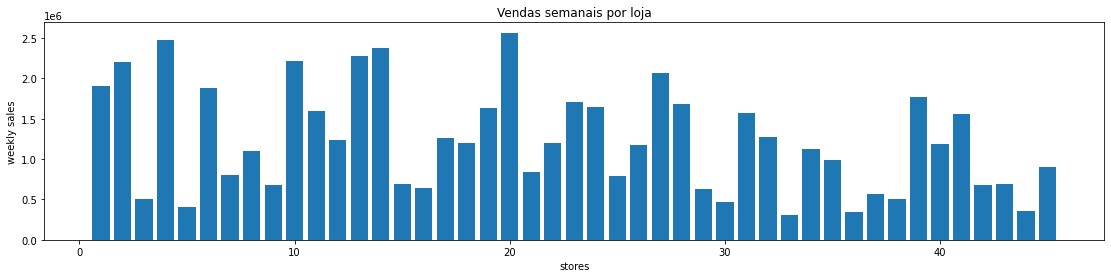

In [187]:
x=df_vendas_2012['store']
y=df_vendas_2012['weekly_sales'] 

plt.figure(figsize=(19, 4))
plt.bar(x, y) 
plt.xlabel("stores")  
plt.ylabel("weekly sales")    
plt.title("Vendas semanais por loja") 
plt.show() 

In [188]:
qt = 45 #Quatidade de loja para analizar
df_vendas_2010_group_15 = df_vendas_2010_group.head(qt + 1)
df_vendas_2010_group_15.rename(columns={'weekly_sales':'weekly_2010'}, inplace=True)
df_vendas_2011_group_15 = df_vendas_2011_group.head(qt + 1)
df_vendas_2011_group_15.rename(columns={'weekly_sales':'weekly_2011'}, inplace=True)
df_vendas_2012_group_15 = df_vendas_2012_group.head(qt + 1)
df_vendas_2012_group_15.rename(columns={'weekly_sales':'weekly_2012'}, inplace=True)

In [189]:
m = pd.merge(df_vendas_2010_group_15, df_vendas_2011_group_15)
mm = pd.merge(m, df_vendas_2012_group_15)
tb_vendas_ano = mm.sort_values(by=['store'])
tb_vendas_ano.head()

,store,weekly_2010,weekly_2011,weekly_2012
11,1,2387950.20,2270188.99,1899676.88
5,2,3436007.68,3224369.80,2196688.46
37,3,605990.41,556925.19,503232.13
4,4,3526713.39,3676388.98,2470206.13
41,5,488362.61,507900.07,402985.70


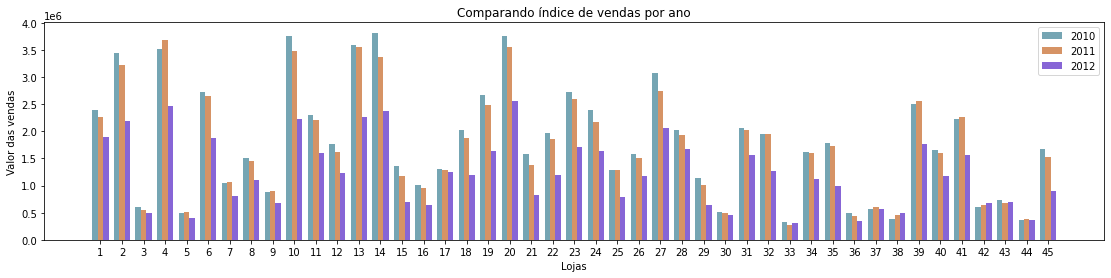

In [190]:
ano_2010 = tb_vendas_ano['weekly_2010'] 
ano_2011 = tb_vendas_ano['weekly_2011']
ano_2012 = tb_vendas_ano['weekly_2012']
barWidth = 0.25

plt.figure(figsize=(19,4))

r1 = np.arange(len(ano_2010))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, ano_2010, color='#75a5b3', width=barWidth, label='2010')
plt.bar(r2, ano_2011, color='#d69365', width=barWidth, label='2011')
plt.bar(r3, ano_2012, color='#8765d6', width=barWidth, label='2012')

plt.xlabel('Lojas')
plt.xticks([r + barWidth for r in range(len(ano_2010))], tb_vendas_ano['store'])
plt.ylabel('Valor das vendas')
plt.title('Comparando índice de vendas por ano')

plt.legend()
plt.show()

### 3.5 - Loja Escolhida 